<a href="https://colab.research.google.com/github/hyeseung-pyeon/projects-archive/blob/main/%5BDevelopment_of_a_Ship_Waiting_time_Prediction_Algorithm_in_Ports_Using_PPO(Proximal_Policy_Optimization)_Technique%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 데이터 전처리

### 훈련 데이터 전처리

In [1]:
# 1-1. 라이브러리 임포트 & 데이터 불러오기
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Google 드라이브 마운트
drive.mount('/content/drive')

# 파일 경로 설정
file_path = '/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/train.csv'

data = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
# 1-2. 데이터 탐색(EDA)
print(data.head())
print("\n")

print(data.info())
print("\n")

print(data.describe())
print("\n")

print(data['SHIP_TYPE_CATEGORY'].value_counts())
print("\n")

print(data.columns.tolist())

      SAMPLE_ID ARI_CO ARI_PO SHIP_TYPE_CATEGORY       DIST               ATA  \
0  TRAIN_000000     SG   GIW5          Container  30.881018  2018-12-17 21:29   
1  TRAIN_000001     IN   UJM2               Bulk   0.000000   2014-09-23 6:59   
2  TRAIN_000002     CN   EUC8          Container   0.000000  2015-02-03 22:00   
3  TRAIN_000003     JP   ZAG4          Container   0.000000   2020-01-17 4:02   
4  TRAIN_000004     SG   GIW5          Container  27.037650   2020-01-26 7:51   

        ID  BREADTH  BUILT  DEADWEIGHT  ...  LENGTH  SHIPMANAGER  \
0  Z618338     30.0     24       24300  ...   180.0       CQSB78   
1  X886125     30.0     13       35900  ...   180.0       SPNO34   
2  T674582     50.0     12      146000  ...   370.0       FNPK22   
3  Y847238     20.0     18        6910  ...   120.0       PBZV77   
4  A872328     50.0     10      116000  ...   300.0       GUCE76   

               FLAG  U_WIND V_WIND AIR_TEMPERATURE        BN  ATA_LT  \
0            Panama     NaN    N

In [3]:
import pandas as pd

# 'ATA' 열을 datetime 타입으로 변환
data['ATA'] = pd.to_datetime(data['ATA'])

# 연, 월, 일, 시, 분을 각각의 열로 분해
data['Year'] = data['ATA'].dt.year
data['Month'] = data['ATA'].dt.month
data['Day'] = data['ATA'].dt.day
data['Hour'] = data['ATA'].dt.hour
data['Minute'] = data['ATA'].dt.minute

# 원본 'ATA' 열을 제거
data.drop('ATA', axis=1, inplace=True)

# 결과 확인
print(data.head())

print(data.info())

      SAMPLE_ID ARI_CO ARI_PO SHIP_TYPE_CATEGORY       DIST       ID  BREADTH  \
0  TRAIN_000000     SG   GIW5          Container  30.881018  Z618338     30.0   
1  TRAIN_000001     IN   UJM2               Bulk   0.000000  X886125     30.0   
2  TRAIN_000002     CN   EUC8          Container   0.000000  T674582     50.0   
3  TRAIN_000003     JP   ZAG4          Container   0.000000  Y847238     20.0   
4  TRAIN_000004     SG   GIW5          Container  27.037650  A872328     50.0   

   BUILT  DEADWEIGHT  DEPTH  ...  AIR_TEMPERATURE        BN  ATA_LT PORT_SIZE  \
0     24       24300   10.0  ...              NaN       NaN       5  0.002615   
1     13       35900   10.0  ...              NaN       NaN      12  0.000217   
2     12      146000   30.0  ...              NaN       NaN       6  0.001614   
3     18        6910   10.0  ...              6.7  2.629350      13  0.000356   
4     10      116000   20.0  ...             25.6  2.495953      15  0.002615   

      CI_HOUR  Year  Month

<ipython-input-4-01c79d62b205>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


SAMPLE_ID             0
ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ID                    0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
SHIPMANAGER           0
FLAG                  0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
CI_HOUR               0
Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
dtype: int64
  SHIP_TYPE_CATEGORY       DIST  DEADWEIGHT  DRAUGHT  PORT_SIZE  BUILT  \
0          Container  30.881018       24300     10.0   0.002615     24   
1               Bulk   0.000000       35900     10.0   0.000217     13   
2          Container   0.000000      146000     20.0   0.001614     12   
3          Container   0.000000        6910

<ipython-input-4-01c79d62b205>:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_data.corr(), annot=True, fmt=".2f")


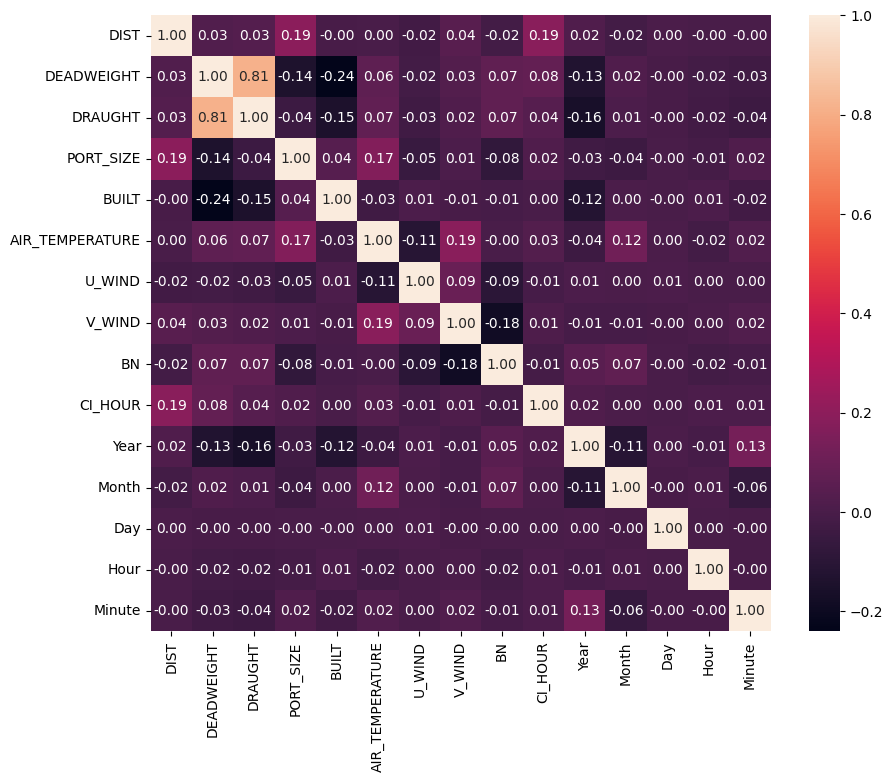

                DIST        BREADTH          BUILT     DEADWEIGHT  \
count  391939.000000  391939.000000  391939.000000  391939.000000   
mean       19.328187      30.550010      14.747989   63577.506780   
std        30.930059      10.957056       7.043988   63515.531024   
min         0.000000      10.000000       0.000000     100.000000   
25%         0.000000      20.000000      10.000000   14300.000000   
50%         6.929678      30.000000      13.000000   47400.000000   
75%        25.692827      40.000000      18.000000   81500.000000   
max       199.980651      60.000000      80.000000  404000.000000   

               DEPTH        DRAUGHT             GT         LENGTH  \
count  391939.000000  391939.000000  391939.000000  391939.000000   
mean       16.476177      11.088106   41348.968666     205.121320   
std         6.045922       4.599292   39304.543664      75.873794   
min         0.000000       0.000000     150.000000      20.000000   
25%        10.000000      10.0000

In [4]:
# 1-3. 결측치 처리 & 주요변수 필터링

# 결측치 처리
data = data.fillna(data.mean())

# 결측치 처리 확인
print(data.isnull().sum())

# 주요 변수 필터링

# 변수 목록
selected_variables = [
    'SHIP_TYPE_CATEGORY',  # 선종 통합 분류
    'DIST',                # 정박지와 접안지 사이의 거리
    'DEADWEIGHT',          # 재화중량톤수
    'DRAUGHT',             # 흘수 높이
    'PORT_SIZE',           # 접안지 영역의 크기
    'BUILT',               # 선박의 연령
    'AIR_TEMPERATURE',     # 기온
    'U_WIND',              # 풍향 벡터 U
    'V_WIND',              # 풍향 벡터 V
    'BN',                  # 보퍼트 풍력 계급
    'CI_HOUR',             # 대기시간
    'Year',
    'Month',
    'Day',
    'Hour',
    'Minute'
]

# 새로운 데이터프레임을 생성
filtered_data = data[selected_variables]
print(filtered_data.head())

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_data.corr(), annot=True, fmt=".2f")
plt.show()

# 참고: 상관계수를 기준으로 필터링하여 "상태"를 정의할 변수를 선정하려고 했지만 실패.

# 요약 통계 검토
print(data.describe())

# 처리된 데이터 저장
data = filtered_data
data.to_csv('/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/train_cleaned.csv', index=False)

In [5]:
# 1-4. 특성공학 & (수치형 데이터에 대한)다중공선성 문제 해결

file_path = '/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/train_cleaned.csv'
data = pd.read_csv(file_path)

# 데이터 상위 5줄 출력
print(data.head())
print("\n")

# 데이터 구조 확인
print(data.info())

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 수치형 데이터만 선택
numeric_data = data.select_dtypes(include=[np.number])

# 무한값 확인
print(np.isinf(numeric_data).sum())

# 무한값이 있다면 처리
numeric_data = numeric_data.replace([np.inf, -np.inf], np.nan).dropna()

  SHIP_TYPE_CATEGORY       DIST  DEADWEIGHT  DRAUGHT  PORT_SIZE  BUILT  \
0          Container  30.881018       24300     10.0   0.002615     24   
1               Bulk   0.000000       35900     10.0   0.000217     13   
2          Container   0.000000      146000     20.0   0.001614     12   
3          Container   0.000000        6910     10.0   0.000356     18   
4          Container  27.037650      116000     10.0   0.002615     10   

   AIR_TEMPERATURE   U_WIND    V_WIND        BN     CI_HOUR  Year  Month  Day  \
0        18.862968 -0.29491 -0.263849  2.706992    3.450000  2018     12   17   
1        18.862968 -0.29491 -0.263849  2.706992    0.000000  2014      9   23   
2        18.862968 -0.29491 -0.263849  2.706992    0.000000  2015      2    3   
3         6.700000 -3.18000 -1.610000  2.629350    0.000000  2020      1   17   
4        25.600000 -0.33000 -3.280000  2.495953  253.554444  2020      1   26   

   Hour  Minute  
0    21      29  
1     6      59  
2    22       

In [6]:
# 다중공선성 확인을 위한 VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]

print(vif_data)

            feature        VIF
0              DIST   1.505579
1        DEADWEIGHT   6.447110
2           DRAUGHT  20.655991
3         PORT_SIZE   2.353536
4             BUILT   5.763036
5   AIR_TEMPERATURE   8.337443
6            U_WIND   1.049895
7            V_WIND   1.099427
8                BN   7.972766
9           CI_HOUR   1.184422
10             Year  38.901928
11            Month   4.594470
12              Day   4.233003
13             Hour   3.448798
14           Minute   3.928145


In [7]:
# 다중공선성 문제 해결 방법1(DRAUGHT, Year 변수 제거)
data_reduced = data.drop(['DRAUGHT', 'Year'], axis=1)

# 제거 후 다중공선성 재확인을 위한 VIF 계산
vif_data_reduced = pd.DataFrame()
numeric_data_reduced = data_reduced.select_dtypes(include=[np.number])
vif_data_reduced["feature"] = numeric_data_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(numeric_data_reduced.values, i) for i in range(len(numeric_data_reduced.columns))]

print(vif_data_reduced)

            feature       VIF
0              DIST  1.495267
1        DEADWEIGHT  2.074710
2         PORT_SIZE  2.265201
3             BUILT  4.691556
4   AIR_TEMPERATURE  7.189209
5            U_WIND  1.043921
6            V_WIND  1.098412
7                BN  6.518487
8           CI_HOUR  1.181798
9             Month  4.267872
10              Day  3.817065
11             Hour  3.159710
12           Minute  3.510284


In [8]:
print(data_reduced.head())

  SHIP_TYPE_CATEGORY       DIST  DEADWEIGHT  PORT_SIZE  BUILT  \
0          Container  30.881018       24300   0.002615     24   
1               Bulk   0.000000       35900   0.000217     13   
2          Container   0.000000      146000   0.001614     12   
3          Container   0.000000        6910   0.000356     18   
4          Container  27.037650      116000   0.002615     10   

   AIR_TEMPERATURE   U_WIND    V_WIND        BN     CI_HOUR  Month  Day  Hour  \
0        18.862968 -0.29491 -0.263849  2.706992    3.450000     12   17    21   
1        18.862968 -0.29491 -0.263849  2.706992    0.000000      9   23     6   
2        18.862968 -0.29491 -0.263849  2.706992    0.000000      2    3    22   
3         6.700000 -3.18000 -1.610000  2.629350    0.000000      1   17     4   
4        25.600000 -0.33000 -3.280000  2.495953  253.554444      1   26     7   

   Minute  
0      29  
1      59  
2       0  
3       2  
4      51  


In [9]:
# 1-5. 월, 일, 시, 분 데이터로 주기성 인코딩하기

data = data_reduced

# 주기성 인코딩 함수
def encode_cyclical(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

# 월, 일, 시간, 분에 대한 주기성 인코딩 적용
data = encode_cyclical(data, 'Month', 12)
data = encode_cyclical(data, 'Day', 31)  # 일반적인 경우 31을 최대값으로 사용
data = encode_cyclical(data, 'Hour', 23)
data = encode_cyclical(data, 'Minute', 59)

# 원래 열 제거
data.drop(['Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)

# 변환된 데이터 확인
print(data.head())

  SHIP_TYPE_CATEGORY       DIST  DEADWEIGHT  PORT_SIZE  BUILT  \
0          Container  30.881018       24300   0.002615     24   
1               Bulk   0.000000       35900   0.000217     13   
2          Container   0.000000      146000   0.001614     12   
3          Container   0.000000        6910   0.000356     18   
4          Container  27.037650      116000   0.002615     10   

   AIR_TEMPERATURE   U_WIND    V_WIND        BN     CI_HOUR     Month_sin  \
0        18.862968 -0.29491 -0.263849  2.706992    3.450000 -2.449294e-16   
1        18.862968 -0.29491 -0.263849  2.706992    0.000000 -1.000000e+00   
2        18.862968 -0.29491 -0.263849  2.706992    0.000000  8.660254e-01   
3         6.700000 -3.18000 -1.610000  2.629350    0.000000  5.000000e-01   
4        25.600000 -0.33000 -3.280000  2.495953  253.554444  5.000000e-01   

      Month_cos   Day_sin   Day_cos  Hour_sin  Hour_cos    Minute_sin  \
0  1.000000e+00 -0.299363 -0.954139 -0.519584  0.854419  5.322217e-02   


In [10]:
# 1-6. 범주형 변수 인코딩과 수치형 변수 정규화 작업

# 상태(State) 특성과 보상(Reward)특성을 정의
state_features = ['DIST', 'DEADWEIGHT', 'PORT_SIZE', 'BUILT', 'AIR_TEMPERATURE', 'U_WIND', 'V_WIND', 'BN',
                  'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos']
reward_features = 'CI_HOUR'

# 범주형 변수와 수치형 변수 분리
categorical_features = ['SHIP_TYPE_CATEGORY']  # 범주형 변수 리스트
numeric_features = state_features

# ColumnTransformer 정의: 범주형 변수 인코딩, 수치형 변수 정규화
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),    # 수치형 변수 정규화
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 변수 인코딩
    ])

# 데이터 변환
data_transformed = preprocessor.fit_transform(data)

In [11]:
# 1-7. 훈련데이터셋 저장하기

# 인코딩된 범주형 변수의 이름 가져오기
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# 새로운 컬럼 리스트 생성 (수치형 특성 + 인코딩된 범주형 특성)
new_columns = numeric_features + encoded_cat_features.tolist() + ['CI_HOUR']

# 'CI_HOUR'를 변환된 데이터에 다시 추가, 데이터프레임으로 만들기
data_transformed_df = pd.DataFrame(np.hstack([data_transformed, data[['CI_HOUR']].values]), columns=new_columns)

# 결과 확인
print(data_transformed_df.head())

# 데이터 저장하기
data = data_transformed_df
data.to_csv('/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/train_transformed.csv', index=False)

       DIST  DEADWEIGHT  PORT_SIZE     BUILT  AIR_TEMPERATURE    U_WIND  \
0  0.373515   -0.618393   2.075833  1.313464     4.794577e-16  0.000000   
1 -0.624901   -0.435760  -0.787562 -0.248154     4.794577e-16  0.000000   
2 -0.624901    1.297676   0.880664 -0.390119     4.794577e-16  0.000000   
3 -0.624901   -0.892185  -0.621043  0.461672    -1.641458e+00 -1.122984   
4  0.249255    0.825350   2.075833 -0.674049     9.091985e-01 -0.013658   

     V_WIND            BN  Month_sin  Month_cos  ...   Day_cos  Hour_sin  \
0  0.000000  4.192532e-16  -0.005837   1.408852  ... -1.325745 -0.862514   
1  0.000000  4.192532e-16  -1.429956   0.004303  ... -0.035179  1.377155   
2  0.000000  4.192532e-16   1.227486   0.706577  ...  1.209566 -0.493794   
3 -0.472042 -7.330055e-02   0.706222   1.220678  ... -1.325745  1.215099   
4 -1.057645 -1.992371e-01   0.706222   1.220678  ...  0.792753  1.295365   

   Hour_cos  Minute_sin  Minute_cos  SHIP_TYPE_CATEGORY_Bulk  \
0  1.095596    0.142778   -1

### 테스트 데이터 전처리

     SAMPLE_ID ARI_CO ARI_PO SHIP_TYPE_CATEGORY        DIST               ATA  \
0  TEST_000000     SG   GIW5          Container    1.826589  2020-06-18 11:58   
1  TEST_000001     CN   WEY7              Cargo   25.399386  2021-05-26 22:20   
2  TEST_000002     CN   NGG6          Container  111.079467   2019-12-16 0:09   
3  TEST_000003     CA   FFM2               Bulk    9.175258   2015-11-16 5:30   
4  TEST_000004     JP   QYY1          Container    0.000000   2018-10-24 1:11   

        ID  BREADTH  BUILT  DEADWEIGHT  ...      GT  LENGTH  SHIPMANAGER  \
0  K322654     50.0     18      117000  ...  109000   340.0       KQMD74   
1  E376681     10.0     13        3810  ...    2560    80.0       LBYS27   
2  F811111     20.0     26       10900  ...    8440   140.0       EKFV15   
3  A737561     30.0      9       55800  ...   31500   190.0       MASW32   
4  A827175     30.0     19       39800  ...   33000   220.0       SIEL54   

        FLAG U_WIND V_WIND  AIR_TEMPERATURE        BN  A

<ipython-input-12-fd10ab2040d3>:51: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


SAMPLE_ID             0
ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ID                    0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
SHIPMANAGER           0
FLAG                  0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
dtype: int64
  SHIP_TYPE_CATEGORY        DIST  DEADWEIGHT  DRAUGHT  PORT_SIZE  BUILT  \
0          Container    1.826589      117000     20.0   0.002615     18   
1              Cargo   25.399386        3810     10.0   0.001028     13   
2          Container  111.079467       10900     10.0   0.001743     26   
3               Bulk    9.175258       55800     10.0   0.00018

<ipython-input-12-fd10ab2040d3>:82: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_data.corr(), annot=True, fmt=".2f")


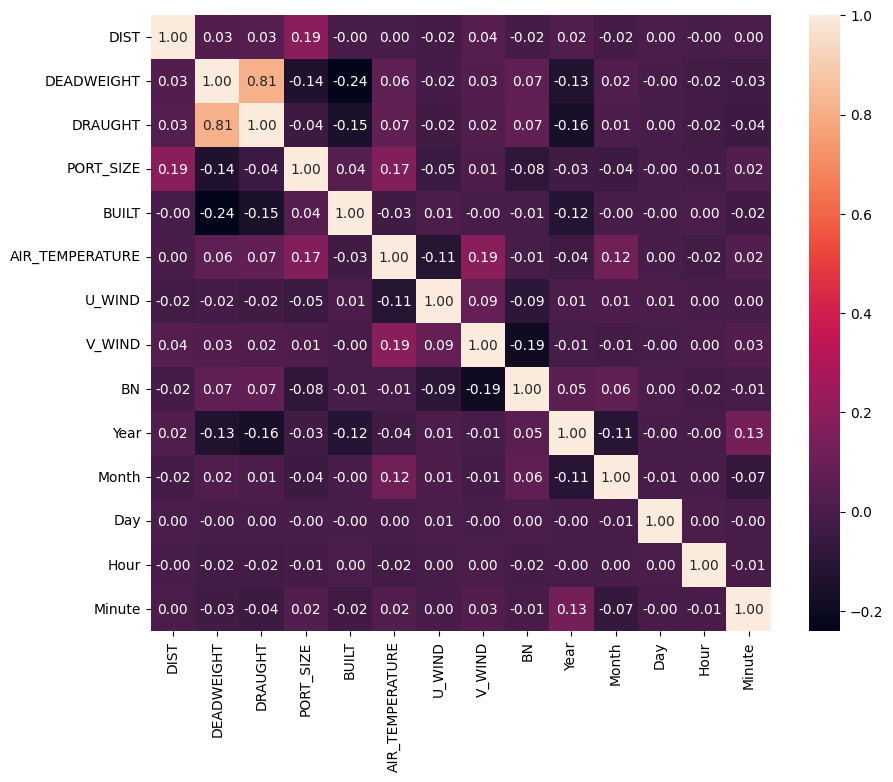

                DIST        BREADTH          BUILT     DEADWEIGHT  \
count  220491.000000  220491.000000  220491.000000  220491.000000   
mean       19.302172      30.529409      14.749944   63478.206321   
std        30.902778      10.940594       7.060537   63438.635816   
min         0.000000      10.000000       0.000000     100.000000   
25%         0.000000      20.000000      10.000000   14100.000000   
50%         6.898127      30.000000      13.000000   47200.000000   
75%        25.632636      40.000000      18.000000   81500.000000   
max       199.997495      70.000000      71.000000  404000.000000   

               DEPTH        DRAUGHT             GT         LENGTH  \
count  220491.000000  220491.000000  220491.000000  220491.000000   
mean       16.463983      11.082675   41253.040759     204.943512   
std         6.040931       4.589031   39185.762241      75.812259   
min         0.000000       0.000000     150.000000      20.000000   
25%        10.000000      10.0000

In [12]:
# 1-1. 라이브러리 임포트 & 데이터 불러오기
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 파일 경로 설정
file_path = '/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/test.csv'

data = pd.read_csv(file_path)

# 1-2. 데이터 탐색(EDA)
print(data.head())
print("\n")

print(data.info())
print("\n")

print(data.describe())
print("\n")

print(data['SHIP_TYPE_CATEGORY'].value_counts())
print("\n")

print(data.columns.tolist())

import pandas as pd

# 'ATA' 열을 datetime 타입으로 변환
data['ATA'] = pd.to_datetime(data['ATA'])

# 연, 월, 일, 시, 분을 각각의 열로 분해
data['Year'] = data['ATA'].dt.year
data['Month'] = data['ATA'].dt.month
data['Day'] = data['ATA'].dt.day
data['Hour'] = data['ATA'].dt.hour
data['Minute'] = data['ATA'].dt.minute

# 원본 'ATA' 열을 제거
data.drop('ATA', axis=1, inplace=True)

# 결과 확인
print(data.head())

print(data.info())

# 1-3. 결측치 처리 & 주요변수 필터링

# 결측치 처리
data = data.fillna(data.mean())

# 결측치 처리 확인
print(data.isnull().sum())

# 주요 변수 필터링

# 변수 목록
selected_variables = [
    'SHIP_TYPE_CATEGORY',  # 선종 통합 분류
    'DIST',                # 정박지와 접안지 사이의 거리
    'DEADWEIGHT',          # 재화중량톤수
    'DRAUGHT',             # 흘수 높이
    'PORT_SIZE',           # 접안지 영역의 크기
    'BUILT',               # 선박의 연령
    'AIR_TEMPERATURE',     # 기온
    'U_WIND',              # 풍향 벡터 U
    'V_WIND',              # 풍향 벡터 V
    'BN',                  # 보퍼트 풍력 계급
    'Year',
    'Month',
    'Day',
    'Hour',
    'Minute'
]

# 새로운 데이터프레임을 생성
filtered_data = data[selected_variables]
print(filtered_data.head())

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_data.corr(), annot=True, fmt=".2f")
plt.show()

# 참고: 상관계수를 기준으로 필터링하여 "상태"를 정의할 변수를 선정하려고 했지만 실패.

# 요약 통계 검토
print(data.describe())

# 처리된 데이터 저장
data = filtered_data
data.to_csv('/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/test_cleaned.csv', index=False)

# 1-4. 특성공학 & (수치형 데이터에 대한)다중공선성 문제 해결

file_path = '/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/test_cleaned.csv'
data = pd.read_csv(file_path)

# 데이터 상위 5줄 출력
print(data.head())
print("\n")

# 데이터 구조 확인
print(data.info())

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 수치형 데이터만 선택
numeric_data = data.select_dtypes(include=[np.number])

# 무한값 확인
print(np.isinf(numeric_data).sum())

# 무한값이 있다면 처리
numeric_data = numeric_data.replace([np.inf, -np.inf], np.nan).dropna()

# 다중공선성 확인을 위한 VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]

print(vif_data)

# 다중공선성 문제 해결 방법1(DRAUGHT, Year 변수 제거)
data_reduced = data.drop(['DRAUGHT', 'Year'], axis=1)

# 제거 후 다중공선성 재확인을 위한 VIF 계산
vif_data_reduced = pd.DataFrame()
numeric_data_reduced = data_reduced.select_dtypes(include=[np.number])
vif_data_reduced["feature"] = numeric_data_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(numeric_data_reduced.values, i) for i in range(len(numeric_data_reduced.columns))]

print(vif_data_reduced)

print(data_reduced.head())

# 1-5. 월, 일, 시, 분 데이터로 주기성 인코딩하기

data = data_reduced

# 주기성 인코딩 함수
def encode_cyclical(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

# 월, 일, 시간, 분에 대한 주기성 인코딩 적용
data = encode_cyclical(data, 'Month', 12)
data = encode_cyclical(data, 'Day', 31)  # 일반적인 경우 31을 최대값으로 사용
data = encode_cyclical(data, 'Hour', 23)
data = encode_cyclical(data, 'Minute', 59)

# 원래 열 제거
data.drop(['Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)

# 변환된 데이터 확인
print(data.head())

# 1-6. 범주형 변수 인코딩과 수치형 변수 정규화 작업

# 상태(State) 특성과 보상(Reward)특성을 정의
state_features = ['DIST', 'DEADWEIGHT', 'PORT_SIZE', 'BUILT', 'AIR_TEMPERATURE', 'U_WIND', 'V_WIND', 'BN',
                  'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos']
# reward_features = 'CI_HOUR' (테스트 데이터는 해당 없음)

# 범주형 변수와 수치형 변수 분리
categorical_features = ['SHIP_TYPE_CATEGORY']  # 범주형 변수 리스트
numeric_features = state_features

# ColumnTransformer 정의: 범주형 변수 인코딩, 수치형 변수 정규화
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),    # 수치형 변수 정규화
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 변수 인코딩
    ])

# 데이터 변환
data_transformed = preprocessor.fit_transform(data)

# 1-7. 테스트데이터셋 저장하기

# 인코딩된 범주형 변수의 이름 가져오기
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# 새로운 컬럼 리스트 생성 (수치형 특성 + 인코딩된 범주형 특성)
new_columns = numeric_features + encoded_cat_features.tolist()

# 데이터프레임으로 만들기
data_transformed_df = pd.DataFrame(np.hstack([data_transformed]), columns=new_columns)

# 결과 확인
print(data_transformed_df.head())

# 데이터 저장하기
data = data_transformed_df
data.to_csv('/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/test_transformed.csv', index=False)

## 1. 전처리 완료된 train, test 데이터 불러오기

In [ ]:
# 1. 전처리 완료된 train, test 데이터 불러오기

from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Google 드라이브 마운트
drive.mount('/content/drive')

# 훈련 데이터
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/train_transformed.csv')
print(data.info())

# 테스트 데이터
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/test_transformed.csv')
print(test_data.info())

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391939 entries, 0 to 391938
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   DIST                          391939 non-null  float64
 1   DEADWEIGHT                    391939 non-null  float64
 2   PORT_SIZE                     391939 non-null  float64
 3   BUILT                         391939 non-null  float64
 4   AIR_TEMPERATURE               391939 non-null  float64
 5   U_WIND                        391939 non-null  float64
 6   V_WIND                        391939 non-null  float64
 7   BN                            391939 non-null  float64
 8   Month_sin                     391939 non-null  float64
 9   Month_cos                     391939 non-null  float64
 10  Day_sin                       391939 non-null  float64
 11  Day_cos                       391939 non-null  float64
 12  Hour_sin          

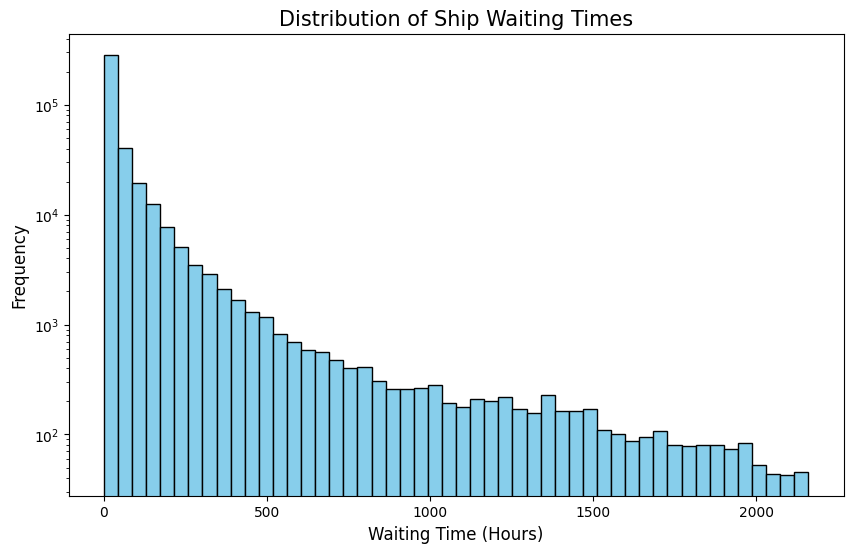

In [ ]:
import numpy as np


# 'CI_HOUR' 열의 히스토그램을 생성합니다.
plt.figure(figsize=(10, 6))
plt.hist(data['CI_HOUR'], bins=50, color='skyblue', edgecolor='black')

# 그래프의 타이틀과 레이블을 추가합니다.
plt.title('Distribution of Ship Waiting Times', fontsize=15)
plt.xlabel('Waiting Time (Hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log')  # 데이터가 극단적으로 치우쳐져 있을 수 있으므로 로그 스케일 사용

# 시각화 자료를 이미지 파일로 저장합니다.
#plt.savefig('ship_waiting_time_distribution.png')

# 이미지 파일을 확인하기 위해 그래프를 출력합니다.
plt.show()


## 2. 강화학습 기본 라이브러리 설치, 임포트

In [ ]:
# 2. 강화학습 기본 라이브러리 설치

# !pip install torch
# !pip install gym

import gym
from gym import spaces

* torch: 파이토치 라이브러리, 딥러닝 모델을 구현하고 실습하기 위해 사용
* gym: OpenAI Gym 라이브러리. 다양한 시뮬레이션 환경을 제공

## 3. 정책 네트워크 정의(Policy Network)

### 3-1. 액터-크리틱 네트워크 클래스 정의

In [ ]:
# 3-1. 액터-크리틱 네트워크 클래스 정의

import torch
import torch.nn as nn


class PolicyNetwork(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(PolicyNetwork, self).__init__()
        # 첫 번째 레이어의 입력 차원을 환경 상태의 차원과 일치시키기
        self.fc1 = nn.Linear(n_inputs, 128)

        # 액터(actor = policy) 네트워크
        self.actor = nn.Sequential(
            nn.Linear(n_inputs, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, n_outputs)
        )

        # 크리틱(critic = value) 네트워크
        self.critic = nn.Sequential(
            nn.Linear(n_inputs, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # 액터 네트워크를 통해 행동 확률 계산
        action_probs = torch.softmax(self.actor(x), dim=-1)

        # 크리틱 네트워크를 통해 상태 가치 추정
        state_values = self.critic(x)

        return action_probs, state_values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 3-2. RolloutBuffer 클래스 정의
- 에이전트의 경험을 저장할 RolloutBuffer 클래스를 구현하기
- 각 타임스텝에서의 상태, 행동, 보상, 다음 상태 등을 저장함.

In [ ]:
# 3-2. RolloutBuffer 클래스 정의_수정

import torch
import torch.distributions

class RolloutBuffer:
    def __init__(self):
        self.states = []
        self.actions = []
        self.log_probs = []
        self.rewards = []
        self.dones = []
        self.next_states = []

    def add(self, state, action, log_prob, reward, done, next_state):
        self.states.append(state)
        self.actions.append(action)
        self.log_probs.append(log_prob)
        self.rewards.append(reward)
        self.dones.append(done)
        self.next_states.append(next_state)

    def clear(self):
        self.states.clear()
        self.actions.clear()
        self.log_probs.clear()
        self.rewards.clear()
        self.dones.clear()
        self.next_states.clear()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 4. 사용자 정의 환경 설정
#### 대기시간 범위: 0.0 ~ 2159.13(약 90일)
#### 1단계: 대기시간의 범주를 설정해고 각각의 데이터에 대해 "대기시간 범주"를 예측(행동공간으로 정의)
#### 2단계: 각 범주에 대해 다시 행동공간을 정의하여 연속적 값으로 예측(행동공간으로 정의)
- train, test 데이터의 차이 존재함. 따라서 훈련과 테스트 환경에서 다르게 동작해야 함.
- 환경 클래스 내에서 훈련 모드인지 테스트 모드인지를 구분하는 플래그를 설정하고, step 메서드에서 이를 확인하여 적절한 동작을 수행하게 해야 함
    - 환경 클래스에 훈련 모드와 테스트 모드를 구분하는 self.train 플래그를 설정.
    - step 메서드 내에서 이 플래그에 따라 다른 동작을 하도록 코드를 수정


In [ ]:
# 4. 사용자 정의 환경설정_ShipWaitingTimeEnv 클래스 정의

import gym
from gym import spaces
import numpy as np

class ShipWaitingTimeEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, data, train=True):
        super(ShipWaitingTimeEnv, self).__init__()
        self.train = train
        self.data = data
        self.current_step = 0

        if train:
            # 훈련 모드일 때만 CI_HOUR 열 사용
            self.ci_hours = data['CI_HOUR'].values
            self.data = self.data.drop('CI_HOUR', axis=1)

        # 행동 공간 및 상태 공간 정의
        self.waiting_time_boundaries = [(0, 4), (4, 8), (8, 12), (12, 24), (24, 48), (48, np.inf)]
        self.action_space = spaces.Discrete(len(self.waiting_time_boundaries))

        num_features = self.data.shape[1]
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(num_features,), dtype=np.float32)

    def step(self, action):
        if self.current_step >= len(self.data):
            raise IndexError("Step index is out-of-bounds.")

        reward = 0
        done = self.current_step >= len(self.data) - 1  # 마지막 데이터에 도달했는지 확인

        if self.train:
            # 훈련 모드에서 보상 계산
            actual_waiting_time = self.ci_hours[self.current_step]
            reward = -abs(actual_waiting_time - action)

        next_state = self._next_observation()
        self.current_step += 1

        info = {}
        return next_state, reward, done, info

    def reset(self):
        self.current_step = 0
        return self.data.iloc[0].values

    def _next_observation(self):
        if self.current_step >= len(self.data):
            return np.zeros(self.observation_space.shape)
        return self.data.iloc[self.current_step].values

    def render(self, mode='human', close=False):
        if mode == 'human':
            current_state = self.data.iloc[self.current_step] if self.current_step < len(self.data) else 'Episode done'
            print(f"Step: {self.current_step}, Current State: {current_state}")

    def close(self):
        if self.train:
            print("Training environment closed.")
        else:
            print("Testing environment closed.")

In [ ]:
# 4번의 주요 변경 사항

# step 메서드 내부의 done 처리를 수정하여 테스트 모드에서 인덱스 초과를 방지합니다.
# reset 메서드 내부에서 current_step을 0으로 초기화합니다.
# render 메서드에서 현재 상태를 출력하는 부분을 업데이트합니다.

## 5. PPO 알고리즘 클래스 및 함수 정의


In [ ]:
# 5. PPO 알고리즘 클래스 및 함수 정의

import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

class PPO:
    def __init__(self, policy_net, optimizer, gamma=0.99, clip_param=0.2, ppo_epochs=4, mini_batch_size=64):
        self.policy_net = policy_net
        self.optimizer = optimizer
        self.gamma = gamma
        self.clip_param = clip_param
        self.ppo_epochs = ppo_epochs
        self.mini_batch_size = mini_batch_size

    def update(self, rollouts):
        # 경험 데이터를 텐서로 변환
        states = torch.tensor(np.array(rollouts.states), dtype=torch.float32)
        actions = torch.tensor(np.array(rollouts.actions), dtype=torch.int64)
        old_log_probs = torch.tensor(np.array(rollouts.log_probs), dtype=torch.float32)
        rewards = torch.tensor(rollouts.rewards, dtype=torch.float32)
        dones = torch.tensor(rollouts.dones, dtype=torch.float32)

        # 보상을 사용하여 누적 보상 계산
        discounted_rewards = []
        R = 0
        for reward, done in zip(reversed(rewards), reversed(dones)):
            if done:
                R = 0
            R = reward + self.gamma * R
            discounted_rewards.insert(0, R)

        discounted_rewards = torch.tensor(discounted_rewards, dtype=torch.float32)

        # 이점 계산 (Advantages)
        _, state_values = self.policy_net(states)
        advantages = discounted_rewards - state_values.detach().squeeze()

        # TensorDataset과 DataLoader를 사용하여 미니 배치 생성
        dataset = TensorDataset(states, actions, old_log_probs, advantages, discounted_rewards)
        dataloader = DataLoader(dataset, batch_size=self.mini_batch_size)

        # PPO 업데이트를 여러 에포크에 걸쳐 수행
        for _ in range(self.ppo_epochs):
            for batch in dataloader:
                batch_states, batch_actions, batch_old_log_probs, batch_advantages, batch_discounted_rewards = batch

                # 현재 정책에서의 로그 확률과 상태 가치 추정
                action_probs, state_values = self.policy_net(batch_states)
                dist = torch.distributions.Categorical(action_probs)

                # 차원 확인 및 조정
                if batch_actions.dim() > 1:
                    batch_actions = batch_actions.squeeze(-1)  # 마지막 차원을 줄임

                log_probs = dist.log_prob(batch_actions)

                # 비율 계산
                ratios = torch.exp(log_probs - batch_old_log_probs)

                # 클리핑된 목적 함수
                surr1 = ratios * batch_advantages
                surr2 = torch.clamp(ratios, 1.0 - self.clip_param, 1.0 + self.clip_param) * batch_advantages
                policy_loss = -torch.min(surr1, surr2).mean()

                # 가치 손실
                value_loss = F.mse_loss(state_values.squeeze(), batch_discounted_rewards)

                # 최적화 단계
                self.optimizer.zero_grad()
                total_loss = policy_loss + value_loss
                total_loss.backward()
                self.optimizer.step()

## 6. 훈련 루프

In [ ]:
# 6. 훈련 루프_수정 (에피소드별 총 보상 로깅 포함)

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

def train(env, policy_net, ppo, num_episodes=1000, max_timesteps=1000):
    rollout_buffer = RolloutBuffer()

    for episode in range(num_episodes):
        state = env.reset()
        episode_rewards = 0

        for t in range(max_timesteps):
            state_tensor = torch.from_numpy(state).float()
            action_probs, _ = policy_net(state_tensor)
            dist = torch.distributions.Categorical(action_probs)
            action = dist.sample()
            log_prob = dist.log_prob(action)

            next_state, reward, done, _ = env.step(action.item())
            episode_rewards += reward

            rollout_buffer.add(state, action.item(), log_prob.item(), reward, done, next_state)

            state = next_state

            if done:
                break

        ppo.update(rollout_buffer)
        rollout_buffer.clear()

        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {episode_rewards}")

    print("Training completed.")

In [ ]:
# 4-3. 환경 및 훈련 루프를 초기화 수정
import numpy as np
import torch.optim as optim

# 환경 초기화
env = ShipWaitingTimeEnv(data, train=True)

# 상태 공간의 크기 확인
input_size = env.observation_space.shape[0]
output_size = len(env.waiting_time_boundaries)

# 정책 네트워크 인스턴스 생성 (입력 차원을 환경의 상태 차원에 맞춤)
policy_net = PolicyNetwork(input_size, output_size)
optimizer = optim.Adam(policy_net.parameters(), lr=0.01)

## 7. 훈련 실행 코드

In [ ]:
# 훈련 실행 코드

ppo = PPO(policy_net, optimizer)
train(env, policy_net, ppo, num_episodes=1000, max_timesteps=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode 1/1000, Total Reward: -64742.168334535
Episode 2/1000, Total Reward: -64781.315001203
Episode 3/1000, Total Reward: -64758.62500119901
Episode 4/1000, Total Reward: -64856.34222342304
Episode 5/1000, Total Reward: -64804.140556755
Episode 6/1000, Total Reward: -64729.91611231102
Episode 7/1000, Total Reward: -64760.14166786102
Episode 8/1000, Total Reward: -64726.70000120104
Episode 9/1000, Total Reward: -64730.730001198994
Episode 10/1000, Total Reward: -64749.87166786101
Episode 11/1000, Total Reward: -64828.33000119901
Episode 12/1000, Total Reward: -64767.803334529024
Episode 13/1000, Total Reward: -64816.697778976995
Episode 14/1000, Total Reward: -64828.44222342304
Episode 15/1000, Total Reward: -64729.304445647016
Episode 16/1000, Total Reward: -64763.233334530996
Episode 17/1000, Total Reward: -64766.27611230901
Episode 18/1000, Total Reward: -64767.71500120102
Episode 19/1000, Total Reward: -64826.87000120101
Episode 20/1000, Total Reward: -64763.848334537004
Episode 2

In [ ]:
# 훈련이 완료된 모델을 저장
import torch

# 훈련된 모델 저장
model_save_path = '/content/drive/My Drive/Colab Notebooks/saved_models/trained_model.pth'
torch.save(policy_net.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /content/drive/My Drive/Colab Notebooks/saved_models/trained_model.pth


## 8. 테스트 루프

In [ ]:
# 8. 테스트 루프_수정 2회

def test(env, policy_net, num_episodes=100, resume_from=0):
    episode_rewards_list = []  # 각 에피소드별 총 보상을 저장할 리스트

    for episode in range(resume_from, num_episodes):
        state = env.reset()
        episode_rewards = 0

        while True:
            state_tensor = torch.from_numpy(state).float()
            with torch.no_grad():
                action_probs, _ = policy_net(state_tensor)
            action = torch.argmax(action_probs).item()

            next_state, reward, done, _ = env.step(action)
            episode_rewards += reward

            state = next_state

            if done:
                episode_rewards_list.append(episode_rewards)
                break

        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {episode_rewards}")
        # 중간 결과 저장
        torch.save({'episode': episode, 'episode_rewards_list': episode_rewards_list}, 'test_checkpoint.pth')

    print("Testing completed.")

# 테스트 재개 함수
def resume_test_checkpoint(filename):
    checkpoint = torch.load(filename)
    return checkpoint['episode'] + 1, checkpoint['episode_rewards_list']


8. 테스트 루프 수정 사항

- PPO 클래스의 update 메서드는 훈련 중에만 호출되어야 하며, 테스트 중에는 호출되지 않아야 함.
- 테스트 루프에서 훈련된 정책 네트워크를 사용하여 각 상태에 대한 행동을 선택하고, 이를 환경에 적용하여 결과를 관찰하는 과정만 수행
- 테스트를 위한 별도의 함수를 작성할 때, PPO.update 메서드는 호출되지 않도록 주의!!!!!!!!!!!

## 9. 테스트 실행 코드

In [ ]:
# 테스트 실행 코드
test_env = ShipWaitingTimeEnv(test_data, train=False)  # 테스트 환경 초기화
policy_net.load_state_dict(torch.load(model_save_path))  # 저장된 모델 불러오기
test(test_env, policy_net, num_episodes=100)

Episode 1/100, Total Reward: 0
Episode 2/100, Total Reward: 0
Episode 3/100, Total Reward: 0
Episode 4/100, Total Reward: 0
Episode 5/100, Total Reward: 0
Episode 6/100, Total Reward: 0
Episode 7/100, Total Reward: 0
Episode 8/100, Total Reward: 0
Episode 9/100, Total Reward: 0
Episode 10/100, Total Reward: 0
Episode 11/100, Total Reward: 0
Episode 12/100, Total Reward: 0
Episode 13/100, Total Reward: 0
Episode 14/100, Total Reward: 0
Episode 15/100, Total Reward: 0
Episode 16/100, Total Reward: 0
Episode 17/100, Total Reward: 0
Episode 18/100, Total Reward: 0
Episode 19/100, Total Reward: 0
Episode 20/100, Total Reward: 0
Episode 21/100, Total Reward: 0
Episode 22/100, Total Reward: 0
Episode 23/100, Total Reward: 0
Episode 24/100, Total Reward: 0
Episode 25/100, Total Reward: 0
Episode 26/100, Total Reward: 0
Episode 27/100, Total Reward: 0
Episode 28/100, Total Reward: 0
Episode 29/100, Total Reward: 0
Episode 30/100, Total Reward: 0
Episode 31/100, Total Reward: 0
Episode 32/100, T

## 10. Submission 데이터 저장

In [ ]:
import pandas as pd

# 데이터프레임 생성을 위한 예시 데이터
# 실제로는 환경에서 얻은 예측값을 사용해야 합니다.
predictions = [0] * 36  # 이는 테스트 루프에서 얻은 예측값으로 대체해야 합니다.
sample_ids = ['TEST_{:06d}'.format(i) for i in range(len(predictions))]

# 예측 결과를 데이터프레임에 저장
submission_df = pd.DataFrame({
    'SAMPLE_ID': sample_ids,
    'CI_HOUR': predictions
})

# 저장 경로 설정
save_path = '/content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/submission.csv'

# 데이터프레임을 CSV 파일로 저장
submission_df.to_csv(save_path, index=False)

print(f"Submission file saved to {save_path}")

Submission file saved to /content/drive/My Drive/Colab Notebooks/dataset/ship_waiting/submission.csv




---

